# Loan Prediction Problem
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data loading and cleaning

In [89]:
# Loading dataset
train = pd.read_csv('train.csv')
rw_application = pd.read_csv('rw_application.csv')

In [90]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
rw_application.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Let's Make copy of the original datasets so we do not hamper the original datasets. 

In [92]:
train_original = train.copy()
rw_application_original = rw_application.copy()

# Initial check of any missing values

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [94]:
rw_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Exploratory Data Analysis

In [95]:
train['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [96]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}>

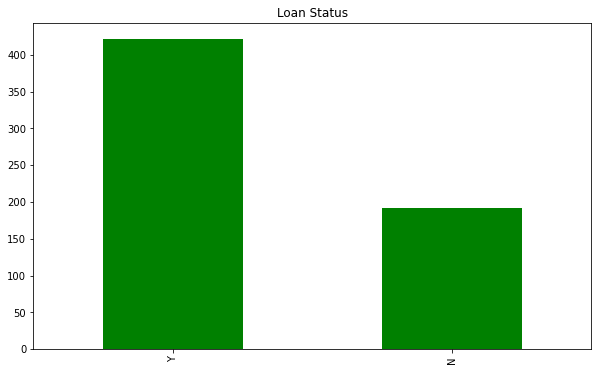

In [97]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), color='green', title='Loan Status')

# 422 people (around 69%) out of 614 that applied the loan were approved.

<AxesSubplot:title={'center':'Credit_History'}>

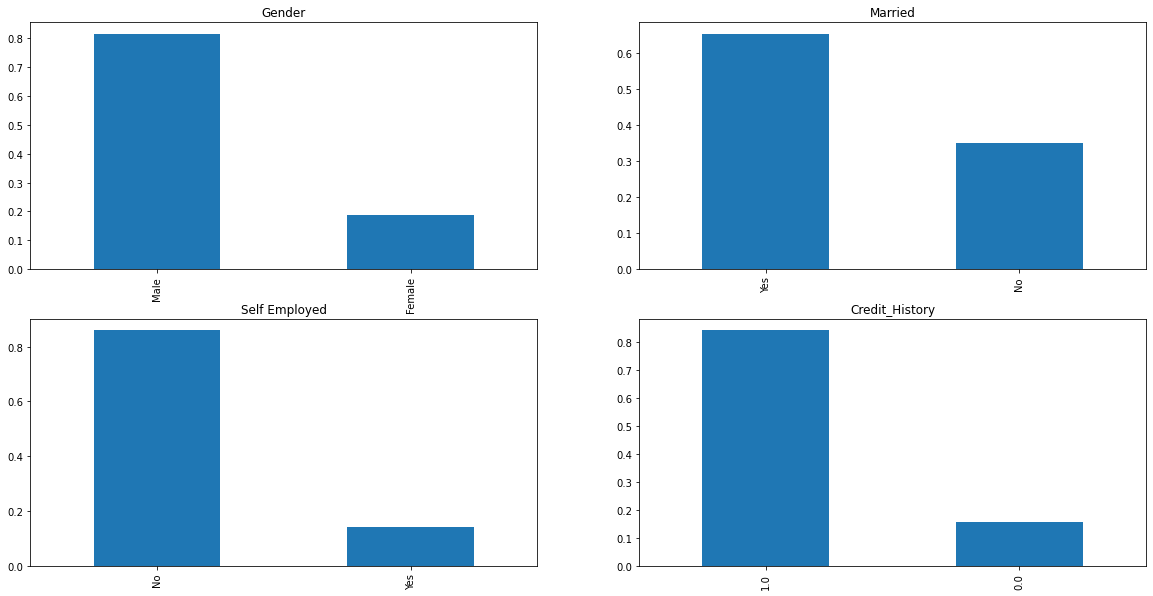

In [98]:
#这个（）里面的数字是什么意思？



plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')





- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

In [99]:
# Around 85% applicants have repaid their debts.  （最后这个图）这个是不是有 85% 的人有 credit history 的意思？

<AxesSubplot:title={'center':'Property Area'}>

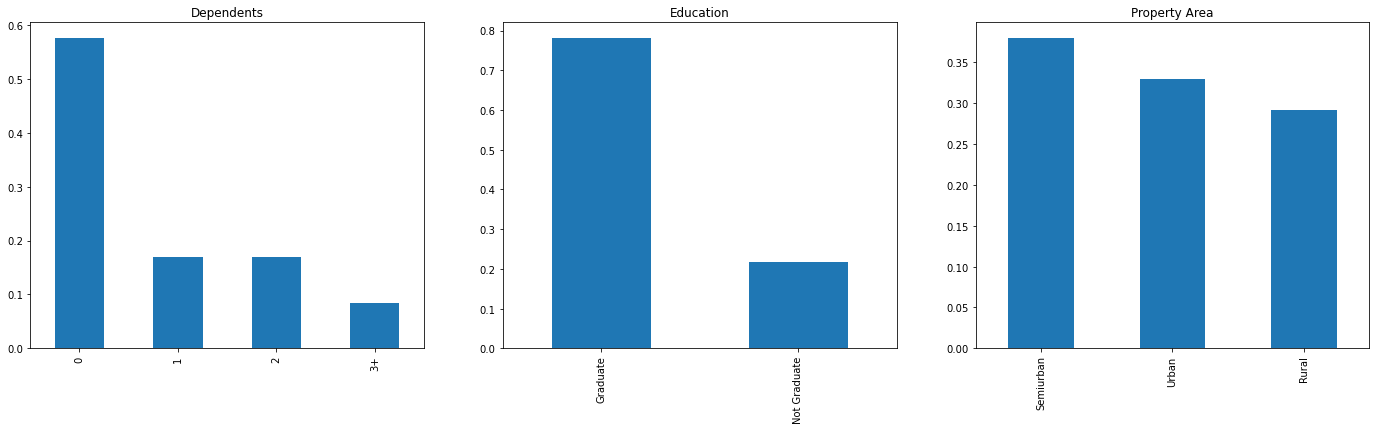

In [100]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

/Users/kaceekirachien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

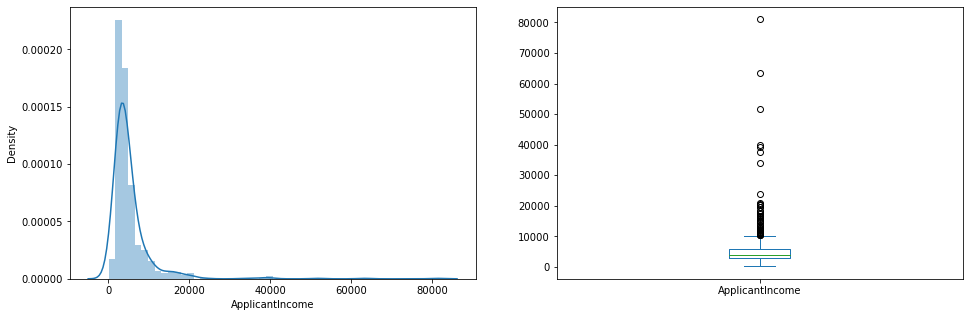

In [101]:
#(1,2,1) (1,2,2) 怎么用？ 什么时候用哪一种呢？

plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(16,5))



In [102]:
#These are subplot grid parameters encoded as a single integer. For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".

#Alternative form for add_subplot(111) is add_subplot(1, 1, 1).

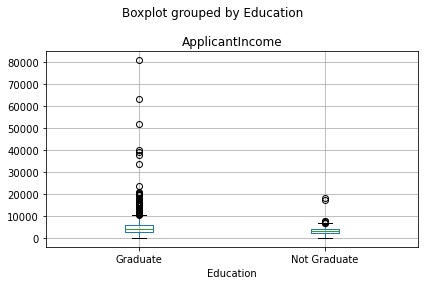

In [103]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

#### There are higher number of graduates with very high incomes which are appearing to be outliers.

In [104]:
# 下面的 .div 是什么意思呢？

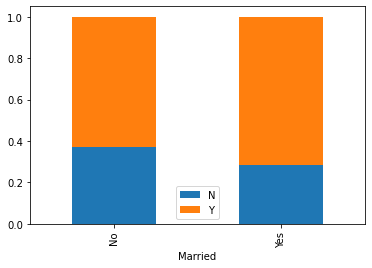

In [105]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

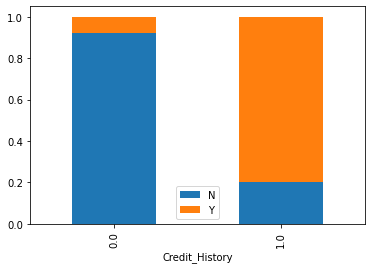

In [106]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

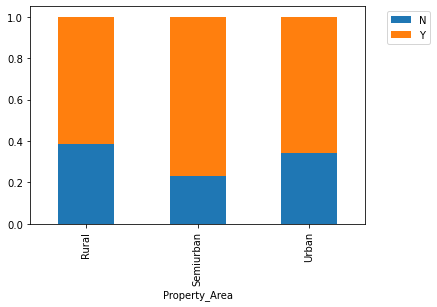

In [107]:
# The "Y" & "N" in legend means "Yes or No for Loan approval".
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [108]:
#Add a new column "Total_Income", which is adding both Applican Income + Co-Applicant Income
#Bins 怎么运作？  最高是放到数值value 有的最高吗？比如 value 最高到 200, 那Bin 里的最后一个是放200, 还是180？
#pd.cut?


train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000] 

group= ['Low', 'Average', 'High', 'Very High']

train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


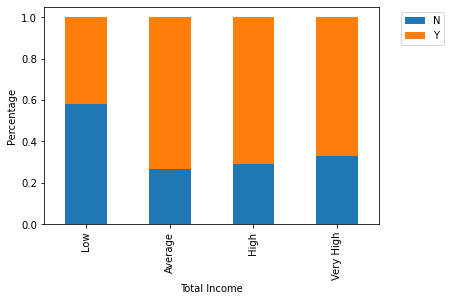

In [109]:
# Once there is "Total_Income" calculated, cross-reference the corelation between "Total_Income" and "Loan_Status",
# to see if higher total income will have better chances of loan approal?

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

#### Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [110]:
### new 新的 comparison ###

In [111]:
# Check the corelation between "income/loan amount ratio" and "loan status".

# First add a new column that calculates the income/loan amount ratio.


train['Income_Loan_Amount_Ratio'] = train['Total_Income'] / train['LoanAmount'] 

bins = [0,20,40,60,80,100] 

group= ['Low', 'Average', 'High', 'Very High', 'Extremely High']

train['Income_Loan_Amount_Ratio_Bin'] = pd.cut(train['Income_Loan_Amount_Ratio'], bins, labels=group)
train


# 但是从original csv 上，没有显示 Income 和 Loan Amount 的 unit 是多少？ (具体是多少 $?)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,Income_Loan_Amount_Ratio,Income_Loan_Amount_Ratio_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High,47.585938,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,45.454545,High
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High,41.175000,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High,42.553191,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,40.845070,High
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High,102.650000,NaN
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High,32.853755,Average
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High,40.550802,High


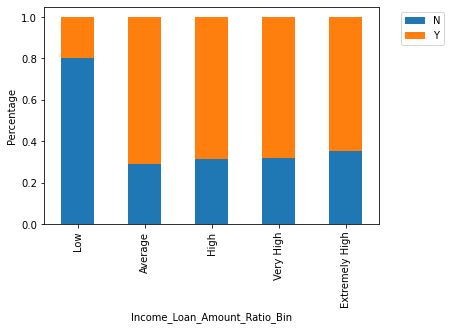

In [112]:
# Then, once there is "loan amount ratio" calculated, cross-reference the corelation between "loan amount ratio" and "Loan_Status",
# to see if higher total income will have better chances of loan approal?


Total_Income_bin = pd.crosstab(train['Income_Loan_Amount_Ratio_Bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Income_Loan_Amount_Ratio_Bin')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

## If the unit of income and loan amount was the same, than looks like the proportion of loan getting approved is the least when the Income/Loan Amount Ratio is low.  (A lower ratio means the income is lower compare to the same loan amount.)

In [113]:
#### TRY AGAIN, ASSUME the "INCOME" is MONTHLY.  AND THE "LOAN AMOUNT" IS in Thousands.

In [114]:
# Check the corelation between "income/loan amount ratio" and "loan status".

# First add a new column that calculates the income/loan amount ratio.


train['Income_Loan_Amount_Ratio'] =  (train['Total_Income']*12) / (train['LoanAmount']*1000)

bins = [0,0.20,0.40,0.60,0.80,1] 

group= ['Low', 'Average', 'High', 'Very High', 'Extremely High']

train['Income_Loan_Amount_Ratio_Bin'] = pd.cut(train['Income_Loan_Amount_Ratio'], bins, labels=group)
train


# 但是从original csv 上，没有显示 Income 和 Loan Amount 的 unit 是多少？ (具体是多少 $?)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin,Income_Loan_Amount_Ratio,Income_Loan_Amount_Ratio_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High,0.571031,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,0.545455,High
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High,0.494100,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High,0.510638,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,0.490141,High
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High,1.231800,NaN
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High,0.394245,Average
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High,0.486610,High


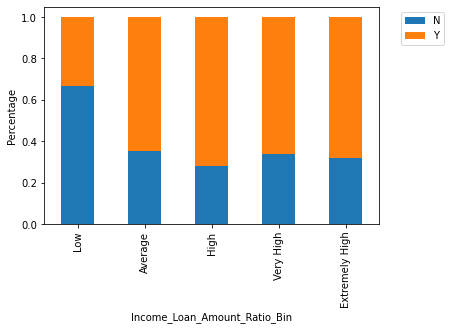

In [115]:
# Then, once there is "loan amount ratio" calculated, cross-reference the corelation between "loan amount ratio" and "Loan_Status",
# to see if higher total income will have better chances of loan approal?


Total_Income_bin = pd.crosstab(train['Income_Loan_Amount_Ratio_Bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Income_Loan_Amount_Ratio_Bin')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

## Overall similar results, looks like the proportion of loan getting approved is the least when the Income/Loan Amount Ratio is low.  (A lower ratio means the income is lower compare to the same loan amount.)  #一样的 loan amount 下，income 越低的loan approval 越低。

In [116]:
#Drop to return to 原来的 table?

train = train.drop(['Total_Income', 'Total_Income_bin', 'Income_Loan_Amount_Ratio', 'Income_Loan_Amount_Ratio_Bin'], axis=1)

In [117]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [119]:
#这几行是什么意思呢？

train['Dependents'].replace('3+', 3, inplace=True)
#test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

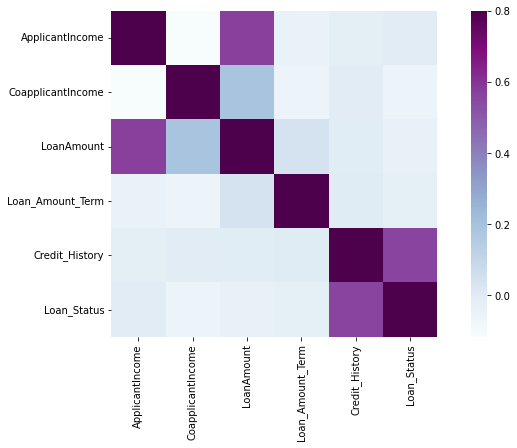

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmax=0.8, square=True, cmap='BuPu')

### We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [122]:
#怎么看以上这个图？